In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('dataset brain.txt', comment='#', sep='\s+')
df.head()

,gender,age-group,head-size,brain-weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


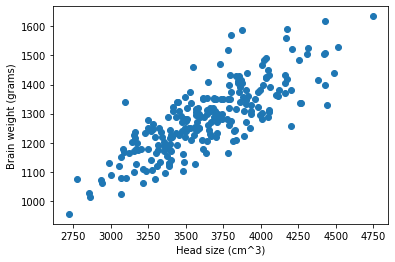

In [ ]:
plt.scatter(df['head-size'], df['brain-weight'])
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

In [ ]:
y = df['brain-weight'].values
y.shape

(237,)

In [ ]:
X = df['head-size'].values
X = X.reshape(X.shape[0], 1)
X.shape

(237, 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=100)

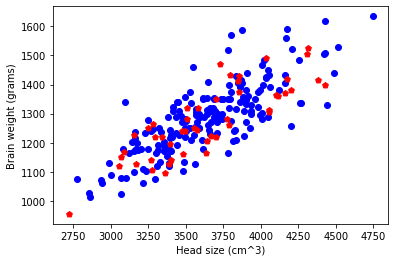

In [ ]:
plt.scatter(X_train, y_train, c='blue', marker='o')
plt.scatter(X_test, y_test, c='red', marker='p')
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

In [ ]:
from diffprivlib.models import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)

print("R2 score for epsilon=%.2f: %.2f" % (regr.epsilon, regr.score(X_test, y_test)))

R2 score for epsilon=1.00: 0.66


/usr/local/lib/python3.6/dist-packages/diffprivlib/models/linear_regression.py:210: PrivacyLeakWarning: Bounds parameters haven't been specified, so falling back to determining bounds from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `bounds_X` and `bounds_y`.
  PrivacyLeakWarning)
/usr/local/lib/python3.6/dist-packages/diffprivlib/models/linear_regression.py:231: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)


In [ ]:
!pip install diffprivlib

In [ ]:
import numpy as np

epsilons = np.logspace(-2, 1, 100)
accuracy = []

for epsilon in epsilons:
    regr = LinearRegression(epsilon=epsilon, data_norm=0.34, bounds_X=(-0.138, 0.2), bounds_y=(25, 346))
    regr.fit(X_train, y_train)
    
    accuracy.append(regr.score(X_test, y_test))

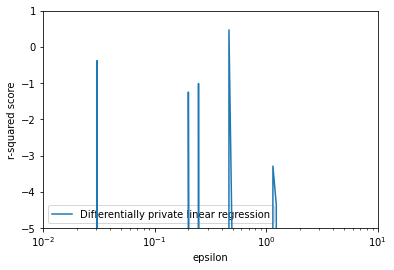

In [ ]:

import matplotlib.pyplot as plt

plt.semilogx(epsilons, accuracy, label="Differentially private linear regression", zorder=10)
plt.xlabel("epsilon")
plt.ylabel("r-squared score")
plt.ylim(-5, 1)
plt.xlim(epsilons[0], epsilons[-1])
plt.legend()